# Demographic

create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
    - based on demographics (only on the information from twm_customer)
    - based on their banking behavior. We can take following things into consideration as banking behavior:
        - do they have savings account? How much do they save?

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Files
customers_df = pd.read_csv('./data/mini-project-III/twm_customer.csv' , delimiter=';')

In [3]:
print("Customers columns: ",customers_df.columns)
print("Customers columns: ",len(customers_df.columns))
print("Customers rows: ",len(customers_df))
customers_df.head()

Customers columns:  Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'name_prefix', 'first_name', 'last_name',
       'street_nbr', 'street_name', 'postal_code', 'city_name', 'state_code'],
      dtype='object')
Customers columns:  15
Customers rows:  747


,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


#### Fields  to keep and drop after looking the table

* **cust_id**          keep
* **income**           keep
* **age**              keep
* **years_with_bank**  keep
* **nbr_children**     drop
* **gender**           keep
* **marital_status**   keep
* **name_prefix**      drop
* **first_name**       drop
* **last_name**        drop
* **street_nbr**       drop
* **street_name**      drop - verify if it is important
* **postal_code**      keep int64
* **city_name**        keep object
* **state_code**       keep object

NOTE: Some fields can be removed later in the process

In [5]:
demog_df = customers_df[['cust_id', 'income', 'age', 'years_with_bank', 'gender', 'marital_status', 'postal_code', 'city_name', 'state_code']].copy()

In [6]:
# Check for nulls in customers table
total = demog_df.isna().sum().sort_values(ascending=False)
percent = (demog_df.isna().sum()/demog_df.isna().sum()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
state_code,0,NaN
city_name,0,NaN
postal_code,0,NaN
marital_status,0,NaN
gender,0,NaN
years_with_bank,0,NaN
age,0,NaN
income,0,NaN
cust_id,0,NaN


In [7]:
#check for dupes for Id
idsUnique = len(set(demog_df.cust_id))
idsTotal = demog_df.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [8]:
demog_df.info

<bound method DataFrame.info of      cust_id  income  age  years_with_bank gender  marital_status  \
0    1362691   26150   46                5     M                2   
1    1362487    6605   71                1     M                2   
2    1363160   18548   38                8     F                1   
3    1362752   47668   54                3     F                1   
4    1362548   44554   59                9     F                4   
..       ...     ...  ...              ...    ...             ...   
742  1363324   14795   36                6     F                4   
743  1362895   26387   56                6     M                2   
744  1362569   61300   50                0     M                2   
745  1363364   15100   37                7     F                2   
746  1363303   17875   18                3     F                1   

     postal_code                                 city_name state_code  
0          89194  Las Vegas                                      NV

In [9]:
demog_df.describe()

,cust_id,income,age,years_with_bank,marital_status,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,1.882195,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,0.892051,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,1.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,1.000000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,2.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,2.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,4.000000,98186.000000


In [10]:
demog_df[demog_df['years_with_bank'] < 1.0]

,cust_id,income,age,years_with_bank,gender,marital_status,postal_code,city_name,state_code
11,1363343,0,15,0,M,1,77061,Houston,TX
15,1362935,0,15,0,M,1,97237,Portland,OR
20,1362853,26505,50,0,F,2,7117,Newark,NJ
21,1362792,3158,80,0,M,2,10088,New York City,NY
30,1363036,24326,60,0,F,2,53217,Milwaukee,WI
...,...,...,...,...,...,...,...,...,...
729,1363059,24744,30,0,F,1,94266,Sacramento,CA
737,1363038,36605,40,0,F,4,73130,Oklahoma City,OK
738,1363263,13269,50,0,M,2,7303,Jersey City,NJ
741,1363099,0,15,0,F,1,96849,Honolulu,HI


In [11]:
demog_df.dtypes

cust_id             int64
income              int64
age                 int64
years_with_bank     int64
gender             object
marital_status      int64
postal_code         int64
city_name          object
state_code         object
dtype: object

In [12]:
for col in demog_df.dtypes[demog_df.dtypes == 'object'].index:
    print(f"Variable: {col} unique values: ", demog_df[col].nunique())

Variable: gender unique values:  2
Variable: city_name unique values:  69
Variable: state_code unique values:  33


In [13]:
for col in demog_df.dtypes[demog_df.dtypes != 'object'].index:
    print(f"Variable: {col} unique values: ", demog_df[col].nunique())

Variable: cust_id unique values:  747
Variable: income unique values:  640
Variable: age unique values:  77
Variable: years_with_bank unique values:  10
Variable: marital_status unique values:  4
Variable: postal_code unique values:  442


### Explore numeric values

/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

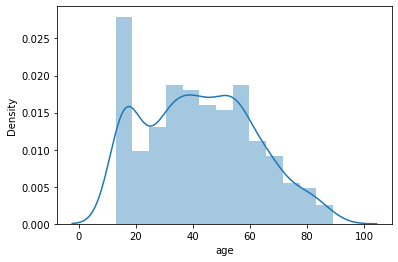

In [14]:
# Verify distribution
sns.distplot(demog_df["age"])

/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

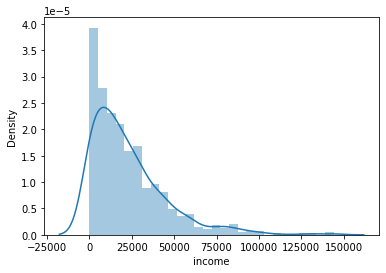

In [15]:
# Verify distribution
sns.distplot(demog_df["income"])

/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='marital_status', ylabel='Density'>

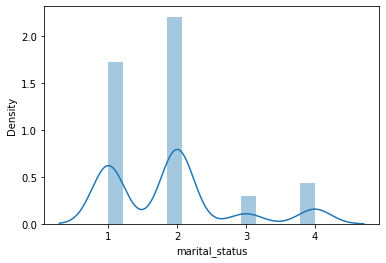

In [16]:
sns.distplot(demog_df["marital_status"])

/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='years_with_bank', ylabel='Density'>

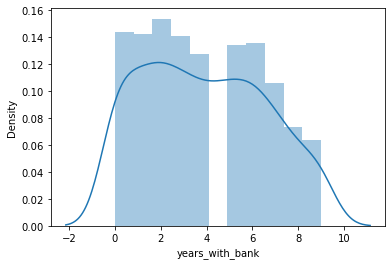

In [17]:
sns.distplot(demog_df["years_with_bank"])

/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='postal_code', ylabel='Density'>

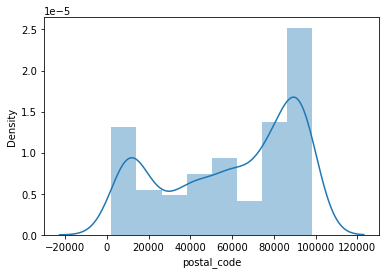

In [18]:
sns.distplot(demog_df["postal_code"])

In [19]:
def num_cat_variables(variable,df):
    print("Variable: ", variable)
    print(df[variable].describe())

### Categorical Values

In [20]:
# How many products
#data['Item_Identifier'].describe()
for col in demog_df.dtypes[demog_df.dtypes == 'object'].index:
    num_cat_variables(col,demog_df)
    print("Unique values: ", demog_df[col].unique())
    print('')

Variable:  gender
count     747
unique      2
top        F 
freq      418
Name: gender, dtype: object
Unique values:  ['M ' 'F ']

Variable:  city_name
count                                          747
unique                                          69
top       New York City                           
freq                                            98
Name: city_name, dtype: object
Unique values:  ['Las Vegas                               '
 'Los Angeles                             '
 'New York City                           '
 'Chicago                                 '
 'Honolulu                                '
 'Washington                              '
 'Houston                                 '
 'San Francisco                           '
 'Philadelphia                            '
 'Portland                                '
 'Riverside                               '
 'Toledo                                  '
 'Seattle                                 '
 'Sacramento             

In [21]:
demog_df.head()

,cust_id,income,age,years_with_bank,gender,marital_status,postal_code,city_name,state_code
0,1362691,26150,46,5,M,2,89194,Las Vegas,NV
1,1362487,6605,71,1,M,2,90159,Los Angeles,CA
2,1363160,18548,38,8,F,1,90024,Los Angeles,CA
3,1362752,47668,54,3,F,1,90172,Los Angeles,CA
4,1362548,44554,59,9,F,4,10138,New York City,NY


In [22]:
# Modify marital status as numbers are affecting and it is not an ordinal variable
# df["col1"].replace(di, inplace=True) - Example

demog_df['marital_status_str'] = ''
demog_df.loc[demog_df['marital_status'] == 1,'marital_status_str'] = "A"
demog_df.loc[demog_df['marital_status'] == 2,'marital_status_str'] = "B"
demog_df.loc[demog_df['marital_status'] == 3,'marital_status_str'] = "C"
demog_df.loc[demog_df['marital_status'] == 4,'marital_status_str'] = "D"

In [23]:
demog_df.head()

,cust_id,income,age,years_with_bank,gender,marital_status,postal_code,city_name,state_code,marital_status_str
0,1362691,26150,46,5,M,2,89194,Las Vegas,NV,B
1,1362487,6605,71,1,M,2,90159,Los Angeles,CA,B
2,1363160,18548,38,8,F,1,90024,Los Angeles,CA,A
3,1362752,47668,54,3,F,1,90172,Los Angeles,CA,A
4,1362548,44554,59,9,F,4,10138,New York City,NY,D


In [24]:
demog_df_cleaned = demog_df.copy()

In [25]:
# Hot Encode 

In [26]:
#dummy_nom_variables = pd.get_dummies(demog_df_cleaned[['gender', 'marital_status_str', 'city_name', 'state_code']])
dummy_nom_variables = pd.get_dummies(demog_df_cleaned[['gender', 'marital_status_str']])
dummy_nom_variables

,gender_F,gender_M,marital_status_str_A,marital_status_str_B,marital_status_str_C,marital_status_str_D
0,0,1,0,1,0,0
1,0,1,0,1,0,0
2,1,0,1,0,0,0
3,1,0,1,0,0,0
4,1,0,0,0,0,1
...,...,...,...,...,...,...
742,1,0,0,0,0,1
743,0,1,0,1,0,0
744,0,1,0,1,0,0
745,1,0,0,1,0,0


In [27]:
demog_df_cleaned = demog_df_cleaned.merge(dummy_nom_variables, left_index=True, right_index=True)

In [28]:
demog_df_cleaned

,cust_id,income,age,years_with_bank,gender,marital_status,postal_code,city_name,state_code,marital_status_str,gender_F,gender_M,marital_status_str_A,marital_status_str_B,marital_status_str_C,marital_status_str_D
0,1362691,26150,46,5,M,2,89194,Las Vegas,NV,B,0,1,0,1,0,0
1,1362487,6605,71,1,M,2,90159,Los Angeles,CA,B,0,1,0,1,0,0
2,1363160,18548,38,8,F,1,90024,Los Angeles,CA,A,1,0,1,0,0,0
3,1362752,47668,54,3,F,1,90172,Los Angeles,CA,A,1,0,1,0,0,0
4,1362548,44554,59,9,F,4,10138,New York City,NY,D,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,F,4,90016,Los Angeles,CA,D,1,0,0,0,0,1
743,1362895,26387,56,6,M,2,10126,New York City,NY,B,0,1,0,1,0,0
744,1362569,61300,50,0,M,2,87194,Albuquerque,NM,B,0,1,0,1,0,0
745,1363364,15100,37,7,F,2,35241,Birmingham,AL,B,1,0,0,1,0,0


In [29]:
#Scale Income
demog_df_cleaned['income (k)']= demog_df_cleaned['income'] / 1000

In [30]:
demog_df_cleaned[['income (k)', 'income']].describe()

,income (k),income
count,747.000000,747.000000
mean,22.728281,22728.281124
std,22.207221,22207.221405
min,0.000000,0.000000
25%,7.118500,7118.500000
50%,17.242000,17242.000000
75%,31.338000,31338.000000
max,144.157000,144157.000000


In [32]:
# drop columns that we do not need
demog_df_cleaned = demog_df_cleaned.drop(['income', 'gender', 'marital_status', 'city_name', 'state_code'], axis=1)

In [33]:
demog_df_cleaned.to_csv('./data/demographics_cleaned.csv')

In [34]:
len(demog_df_cleaned.columns)

12

In [35]:
demog_df_plot = demog_df_cleaned.copy()

In [37]:
demog_df_plot = demog_df_plot.drop(['marital_status_str'], axis=1)

In [38]:
for col in demog_df_plot.dtypes[demog_df_plot.dtypes == 'object'].index:
    print(f"Variable: {col} unique values: ", demog_df_plot[col].nunique())

In [49]:
demog_df_plot

,cust_id,age,years_with_bank,postal_code,gender_F,gender_M,marital_status_str_A,marital_status_str_B,marital_status_str_C,marital_status_str_D,income (k)
0,1362691,46,5,89194,0,1,0,1,0,0,26.150
1,1362487,71,1,90159,0,1,0,1,0,0,6.605
2,1363160,38,8,90024,1,0,1,0,0,0,18.548
3,1362752,54,3,90172,1,0,1,0,0,0,47.668
4,1362548,59,9,10138,1,0,0,0,0,1,44.554
...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,36,6,90016,1,0,0,0,0,1,14.795
743,1362895,56,6,10126,0,1,0,1,0,0,26.387
744,1362569,50,0,87194,0,1,0,1,0,0,61.300
745,1363364,37,7,35241,1,0,0,1,0,0,15.100


In [53]:
demog_df_plot.to_csv('./data/demographics.csv')

In [40]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [42]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

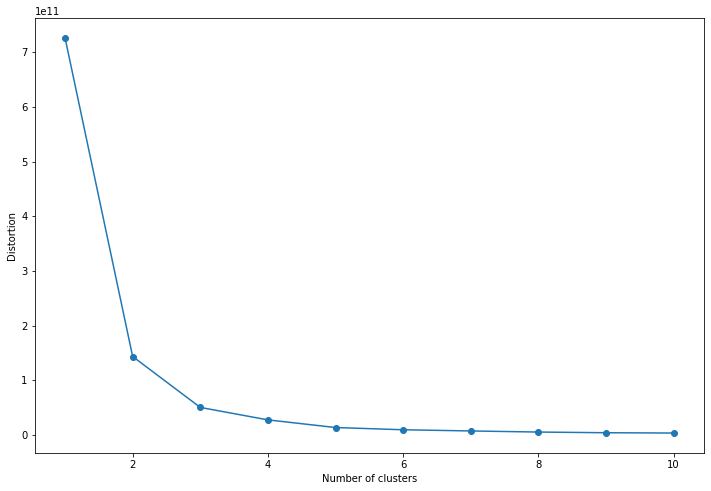

In [45]:
plot_distortion(demog_df_plot,max_clusters=10)

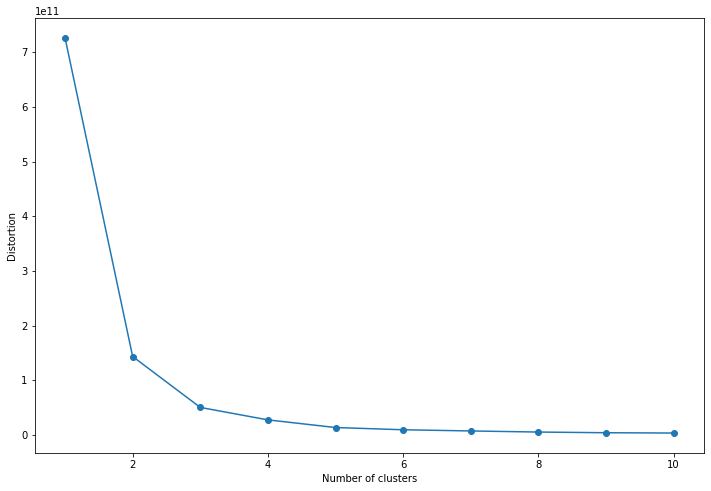

In [43]:
plot_distortion(demog_df_plot,max_clusters=10)

In [47]:
# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

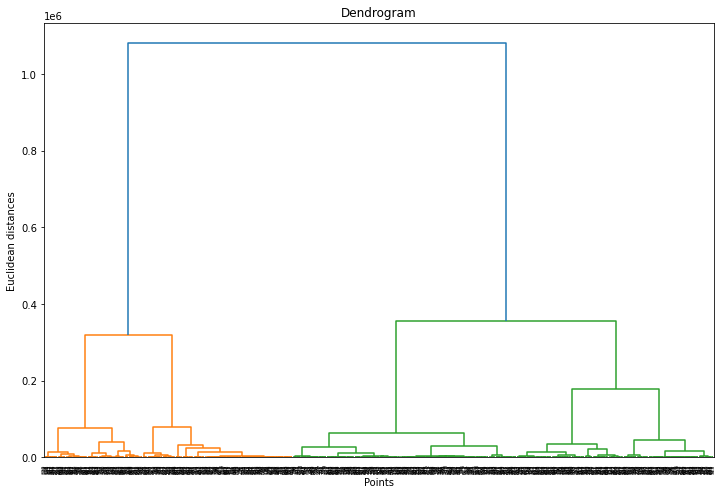

In [48]:
plot_dendrogram(demog_df_plot)

In [50]:
km = KMeans(n_clusters=3,
           n_init=20,
           random_state=0)

In [52]:
y_km = km.fit_predict(demog_df_plot)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)